In [77]:
# !pip install pandas
# !pip install tweepy
# !pip install vaderSentiment
# !pip install tweepy
# !pip install PyHamcrest
# !pip install twython

In [81]:
import tweepy
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np
import ast

In [82]:
#My Twitter API Authentication Variables
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [91]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

targets = ["hp", "apple", "microsoft", "asus"]
results = []
number_of_tweets = 200

for item in targets:
    results.append(api.search(item, count=number_of_tweets))

In [92]:
shortest_list = min((len(x) for x in results))
print(shortest_list)

90


In [93]:
tweet_text = [[tweet.text for tweet in tweets] for tweets in results]
reshaped = [[] for i in range(shortest_list)]

for item in tweet_text:
    index = 0
    for tweet in item:
        reshaped[index].append(tweet)
        if index == shortest_list - 1:
            break
        index += 1
        
data = pd.DataFrame(data=reshaped, columns= targets)

display(data)

,hp,apple,microsoft,asus
0,RT @talesof_therays: 【お知らせ】\nこんばんは。運営です。\n続けてコ...,Apple CarPlay: Display im Auto konfigurieren h...,RT @MSEurope: Great opportunity to know more a...,Asus Dual-Band 802.11ac WiFi Router for $40 + ...
1,RT @torasan_movie: 【号泣嗚咽応援上映】の開催が決定しました🐱\n\n皆様...,RT @layzhang: I caught up with @travismills on...,RT @WhiteBit6: Microsoft Wants to Help Make Yo...,【徵求】\n雲林 斗南\nASUS筆電充電器 19V\n借用到3/1
2,RT @Granblue_GW: ◆2年生チーム最終性能まとめ\n最終後\n・奥義演出が豪華...,➜Yuuko Hirose -WIND- https://t.co/WlTPeZ2EZj #...,RT @mtholfsen: Ready to get started with @Micr...,アメブロを更新しました。 『世界のPC大手、台湾のASUS、スマートフォン「ZenFone6...
3,RT @kfyyh0927: インディ開幕まで あと １０日 じゃ！！ (写真：佐藤琢磨公式...,RT @layzhang: I caught up with @travismills on...,@Tessa_824 really out here using Microsoft wor...,RT @ASUSJapan: 【ASUS Store Akasaka 1st Year An...
4,"280. 이시다 아유미, 사야시 리호 https://t.co/PHzacskbpz",RT @yaruki_arimi: ＼Podcastの最新話でたよ！／\n\n今週は「親友の...,@GarethBrown @ThomasMaurer That’s correct - ht...,RT @ASUSJapan: 【ASUS Store Akasaka 1st Year An...
5,🇺🇸ミッキーのオムツケーキは大人気です👶🎉\n.\n男の子の出産祝いにどうぞ😊✨ https...,RT @layzhang: I caught up with @travismills on...,"THQ doing that AMA was dumb, but people from M...",世界のPC大手、台湾のASUS、スマートフォン「ZenFone6」を発表？ https://...
6,RT @Granblue_GW: ◆2年生チーム最終性能まとめ\n最終後\n・奥義演出が豪華...,RT @green_tea_niji: 声優 陶山恵実里さんが歌う\nリフレクトムーンの新曲...,"RT @Xbox: Seven historic cars, seventy thousan...",ASUS Zenfone 5 Lite - Rouge\n\nASUS Zenfone 5 ...
7,"Que peligro tan hp, no sabía q los médicos ten...",RT @layzhang: I caught up with @travismills on...,RT @Bright: Getest: de #Hololens2 die je hand-...,"RT @Clarkdale_f: ハードオフで電源が入らないとされているジャンクPCを5,4..."
8,"RT @Suharno41747558: HARNO BADUT: menyewakan,...",RT @TaylorMadeGolf: Special guest @NiallOffici...,RT @nullenc0de: Looks like I was only scraping...,RT @ASUSJapan: 【ASUS Store Akasaka 1st Year An...
9,RT @Granblue_GW: ◆2年生チーム最終性能まとめ\n最終後\n・奥義演出が豪華...,RT @layzhang: I caught up with @travismills on...,"RT @Xbox: The Season of the Dragon is upon us,...","RT @Clarkdale_f: ハードオフで電源が入らないとされているジャンクPCを5,4..."


In [94]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\INYANG\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [95]:
SIA = SentimentIntensityAnalyzer()

sentiments = {}
for target in targets:
    sentiments[target] = []
    
    for row in data[target]:
        polarity = SIA.polarity_scores(row)
        sentiments[target].append(polarity)

print((sentiments[targets[0]])[2])
# se = pd.Series(listy)
# data['polarity'] = se.values

# display(data.head(100))

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [96]:
cummulative_sentiments = {}

for key in sentiments:
    pos = 0
    neg = 0
    comp = 0
    for row in sentiments[key]:
        pos += row['pos']
#         print(pos)
        neg += row['neg']
        comp += row['compound']
    
    average_pos = (pos/len(sentiments[key]))*100 #CONVERT VALUES TO PERCENTAGE VALUE
    average_neg = (neg/len(sentiments[key]))*100
    average_comp = (comp/len(sentiments[key]))*100 if (comp/len(sentiments[key]))*100 > 0 else 0
    
    cummulative_sentiments[key] = {"pos" : average_pos, "neg" : average_neg, "comp" : average_comp}
for target in targets:
    
    print(target, cummulative_sentiments[target])
# print('Positive :',average_pos, 'Negative :', average_neg, 'Compound :', average_comp)

hp {'pos': 0.7977777777777778, 'neg': 0.5266666666666666, 'comp': 0.9940000000000001}
apple {'pos': 3.6255555555555556, 'neg': 0.9944444444444445, 'comp': 6.476222222222224}
microsoft {'pos': 6.8133333333333335, 'neg': 1.9555555555555555, 'comp': 10.70622222222222}
asus {'pos': 2.01, 'neg': 1.5288888888888887, 'comp': 1.2690000000000001}


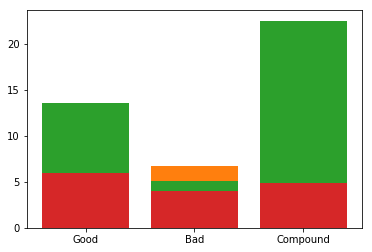

In [90]:
for target in targets:
    plt.bar(height = [cummulative_sentiments[target]["pos"], cummulative_sentiments[target]["neg"], cummulative_sentiments[target]["comp"]], x = [ "Good", "Bad", "Compound"])

    plt.plot()
